In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
survey = pd.read_csv('../participants_survey.csv', delimiter=";")
survey = survey.drop('time_record',axis=1)
# survey = survey.set_index('roomid')

In [3]:
survey

,sleep_hours,happiness,noise_level,roomid,light,dba,team
0,5,5,0,405,750,45,flipover
1,5,3,1,405,750,45,flipover
2,5,3,1,405,750,45,flipover
3,5,5,1,405,750,45,flipover
4,6,5,0,405,750,45,flipover
5,5,4,1,405,750,45,flipover
6,3,4,1,405,750,45,flipover
7,4,5,1,405,750,45,flipover
8,0,4,1,405,750,45,officehealth
9,5,3,0,405,750,45,officehealth


,happiness
happiness,1.0


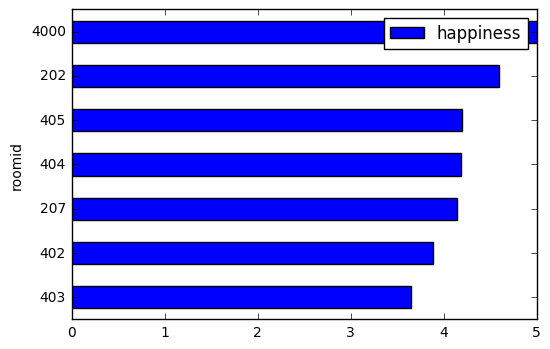

In [32]:
happiness_room_avg = pd.DataFrame(survey.groupby('roomid').happiness.sum() / survey['roomid'].value_counts())
# happiness_room_avg['people_number'] = survey.groupby('roomid')['team'].count()
# happiness_room_avg.rename(['happiness','people_number'],inplace=True)
# happiness_room_avg = happiness_room_avg.set_index('happiness')
happiness_room_avg.columns = ['happiness']
# happiness_room_avg.columns = ['happiness','people_number']
happiness_room_avg = happiness_room_avg.set_index(survey.groupby('roomid')['team'].count().index)
h = happiness_room_avg.sort_values(by='happiness')
h.plot(kind="barh")

h.corr()

In [5]:
happiness_room_avg

,happiness,people_number
roomid,,
202,4.600000,10
207,4.142857,7
402,3.888889,9
403,3.647059,17
404,4.187500,16
405,4.200000,15
4000,5.000000,6


In [6]:
sleep_hours = pd.DataFrame(survey.groupby('happiness').sleep_hours.sum())
sleep_hours['people_number'] = survey.groupby('happiness')['team'].count()
sleep_hours['sleep_avg'] = sleep_hours['sleep_hours'] / sleep_hours['people_number']
sleep_hours


,sleep_hours,people_number,sleep_avg
happiness,,,
1,13,3,4.333333
2,4,1,4.000000
3,39,8,4.875000
4,175,37,4.729730
5,142,31,4.580645


In [7]:
happiness_room_sleeping = pd.DataFrame(survey.groupby('roomid').sleep_hours.mean())
happiness_room_sleeping

,sleep_hours
roomid,
202,5.300000
207,5.571429
402,4.888889
403,4.647059
404,4.250000
405,4.333333
4000,4.166667


In [14]:
room403 = survey[survey['roomid']==403]

In [138]:

def get_happiness_room_avg():
    """Report main bar chart. Rooms versus happiness and people number"""
    happiness_room_avg = pd.DataFrame(survey.groupby('roomid').happiness.sum() / survey['roomid'].value_counts())
    # happiness_room_avg['people_number'] = survey.groupby('roomid')['team'].count()
    # happiness_room_avg.columns = ['happiness', 'people_number']
    
    happiness_room_avg.reset_index(level=0,inplace=True)
    happiness_room_avg.reset_index(drop=True,inplace=True)
    happiness_room_avg.columns = ['roomid', 'happiness']
    return happiness_room_avg.sort_values(by='happiness')

In [181]:
from bokeh.models import Legend
from bokeh.charts import Bar, output_file, show
from bokeh.embed import components
from bokeh.plotting import figure
from bokeh.resources import INLINE
from bokeh.charts.attributes import CatAttr
from bokeh.io import output_notebook
from bokeh.charts.attributes import cat
output_notebook()
data1 = get_happiness_room_avg()

import matplotlib.cm as cm
import numpy as np

colormap =cm.get_cmap("jet")
different_colors=7
color_mapping=colormap(np.linspace(0,1,different_colors),1,True)
bokeh_palette=["#%02x%02x%02x" % (r, g, b) for r, g, b in color_mapping[:,0:3]]

data = pd.DataFrame({'room':data1['roomid'].tolist(), 'happiness': data1['happiness'].tolist()}, 
                    index=[x for x in range(len(data1['roomid']))])
plt = Bar(data, values='happiness', label=CatAttr(columns=['room'], sort=False),
          xscale="categorical", yscale="linear",palette=bokeh_palette)
#           color=['yellow','red','yellow','red','yellow','red','green'],
#          palette=["red", "yellow", "blue"])
plt.legend.orientation = "horizontal"
plt._set_colors = lambda *args: ["#df5320", "#00ad9c", "#c33ff3"]
show(plt)
# data1

Loading BokehJS ...

In [176]:
import plotly.plotly as py
import plotly.graph_objs as go
py.tools.set_credentials_file(username='IvanChernuha', api_key='w8mmiuiro5')

AttributeError: 'module' object has no attribute 'tools'

In [173]:
trace0 = go.Bar(
    x=data1['roomid'].tolist(),
    y=data1['happiness'].tolist(),
    marker=dict(
        color=['rgba(204,204,204,1)', 'rgba(222,45,38,0.8)',
               'rgba(204,204,204,1)', 'rgba(204,204,204,1)',
                'rgba(204,204,204,1)', 'rgba(204,204,204,1)',
               'rgba(204,204,204,1)']),
)

data = [trace0]
layout = go.Layout(
    title='Least Used Feature',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='color-bar')

PlotlyLocalCredentialsError: 
Couldn't find a 'username', 'api-key' pair for you on your local machine. To sign in temporarily (until you stop running Python), run:
>>> import plotly.plotly as py
>>> py.sign_in('username', 'api_key')

Even better, save your credentials permanently using the 'tools' module:
>>> import plotly.tools as tls
>>> tls.set_credentials_file(username='username', api_key='api-key')

For more help, see https://plot.ly/python.
